# Семинар 3. Логистическая регрессия

## Логистическая регрессия

В случае бинарной классификации простейший линейный классификатор ввыглядит так:

$$
f(x_i, w) = \mathrm{sign}\left(\langle x_i, w \rangle\right).
$$

Функция потерь для такой задачи – это сумма индикаторов того, что предсказание сделано неверно: 

$$L(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \ne \mathrm{sign}\left(\langle x_i, w \rangle\right)].$$

Гораздо удобнее переписать эту функцию потерь через отступ:

$$
L(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \langle x_i, w \rangle < 0].
$$

Понятно, что такую функцию проблематично дифференцировать по $w$. Вместо этого будем минимизировать некоторую функцию $L'(X, w)$, являющуюся верхней оценкой для $L(X, w)$, и надеяться, что минимизация $L'(X, w)$ позволит достаточно хорошо минимизировать и $L(X, w)$.

Логистическая регрессия предлагает использовать логистическую функцию потерь:

$$
L'(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}\log(1 + e^{-y_i \langle x_i, w \rangle}) \rightarrow \min_w.
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

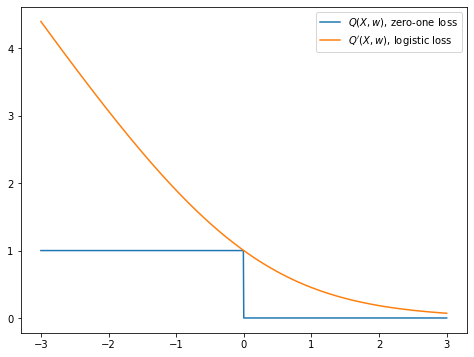

In [2]:
x = np.concatenate((np.linspace(-3, 0, 500), np.linspace(0, 3, 500)))
np.random.seed(123)
y = np.ones(1000)
w = np.ones(1000)
M = y * x * w

plt.figure(figsize = (8, 6))
_ = plt.plot(x * w, x < 0, label = '$Q(X, w)$, zero-one loss')
_ = plt.plot(M, np.log2(1 + np.exp(-M)), label = "$Q'(X, w)$, logistic loss")
_ = plt.legend()

Можно показать, что задачу логистичсекий регрессии можно перерписать в следующем виде:

$$
L'(X, w) = -\frac{1}{\ell} \sum_{i=1}^{\ell} [y_i = 1]\log\sigma(\langle x_i, w \rangle) + [y_i = -1](1 - \log(\sigma(\langle x_i, w \rangle))
$$

Эта функция называется log-loss или кросс-энтропией между истинной целевой переменной и предсказанными вероятностями.

Регуляризация вводится таким же образом, как это было в случае линейной регрессии. Например, функция потерь для $L$-$2$ регуляризации выглядит так:

$$
\bar{L}'(X, w) = L'(X, w) + \frac{1}{2}\lambda\|w\|^2_2.
$$

## Практика

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка. 

[<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" alt="drawing" width="800"/>](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

data = iris['data']
y = iris['target'].values

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y[:5]

array([0, 0, 0, 0, 0])

### Задание 1.

Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида `versicolor` (y=1) имели метку 1, а прочих видов – метку 0. 

In [6]:
... # YOUR CODE HERE

### Задание 2. 

Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Построим диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы. 

In [7]:
# YOUR CODE HERE
X = ...

In [8]:
from sklearn.model_selection import train_test_split

# делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Приведем занчения всех входных признаков к одному масштабу. Для этого применим функцию `StandardScaler`. Это преобразование приводит значения каждого признака к нулевому среднему и единичной дисперсии:

$$
X_{new} = \frac{X - \mu}{\sigma}
$$

где, $\mu$ - среднее значение признака

$\sigma$ - стандартное отклонение значений признака

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train, y_train) # считаем \mu и \sigma

# делаем преобразование данных
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

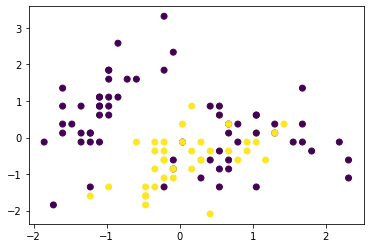

In [10]:
plt.scatter(X_train_ss[:, 0], X_train_ss[:, 1], c=y_train)
plt.show()

### Задание 3. 

Сравним качество для KNN и логрега.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

#### Обучение

In [13]:
# обучите классификаторы

# YOUR CODE HERE
...
...

LogisticRegression()

#### Прогноз метки класса

In [14]:
# получите прогнозы для тестовой выборки

y_test_pred_knn = ... # YOUR CODE HERE
y_test_pred_logreg = ... # YOUR CODE HERE

In [15]:
y_test_pred_knn[:5], y_test_pred_logreg[:5]

(array([0, 1, 0, 1, 0]), array([1, 0, 1, 0, 0]))

#### Прогноз вероятности класса

In [16]:
y_test_proba_knn = knn.predict_proba(X_test_ss)
y_test_proba_logreg = logreg.predict_proba(X_test_ss)

In [17]:
y_test_proba_knn[:5]

array([[1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ]])

In [18]:
y_test_proba_logreg[:5]

array([[0.29419641, 0.70580359],
       [0.57205374, 0.42794626],
       [0.46753539, 0.53246461],
       [0.63769057, 0.36230943],
       [0.90566268, 0.09433732]])

#### Метрика качества

In [19]:
from sklearn.metrics import accuracy_score
print(f'KNN: {accuracy_score(y_test, y_test_pred_knn)}')
print(f'LogReg: {accuracy_score(y_test, y_test_pred_logreg)}')

KNN: 0.7555555555555555
LogReg: 0.8444444444444444


#### Строим разделяющую поверность

In [20]:
#!pip install mlxtend

Text(0.5, 1.0, 'Разделяющая поверхность для KNN')

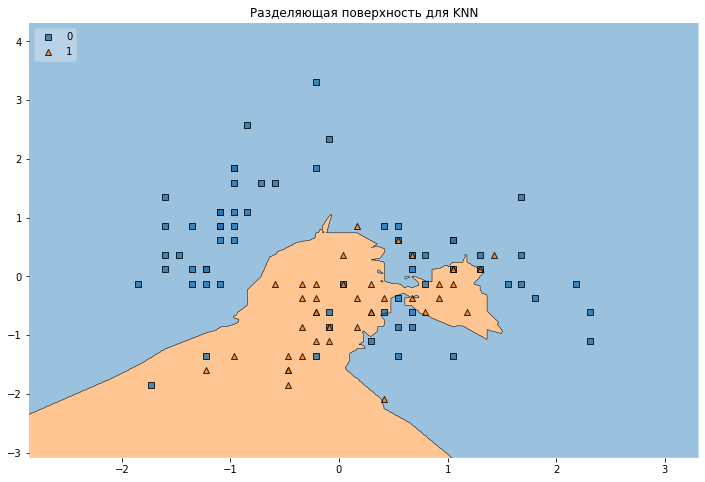

In [21]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=knn, legend=2)
plt.title('Разделяющая поверхность для KNN')

Text(0.5, 1.0, 'Разделяющая поверхность для логрега')

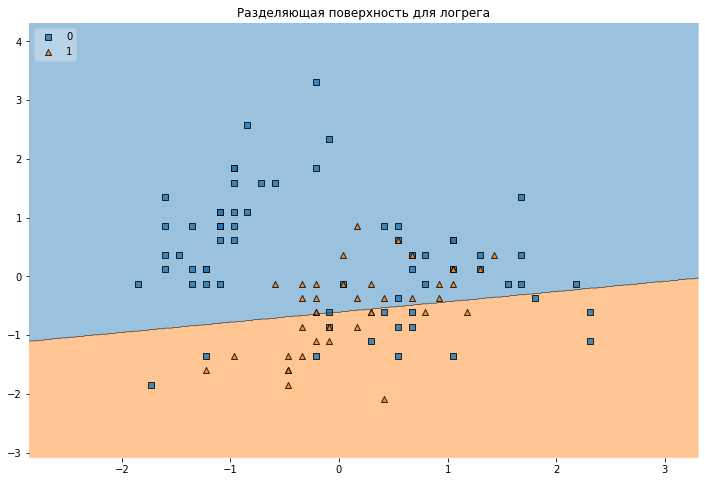

In [22]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега')

Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

### Задание 4.

Обучите три различные логистические регрессии с разным параметром регуляризации $C$.

In [23]:
logreg_1 = LogisticRegression(C=0.01)
logreg_2 = LogisticRegression(C=0.05)
logreg_3 = LogisticRegression(C=10)

Acc., C=0.01:  0.7777777777777778
Acc., C=0.05:  0.8444444444444444
Acc., C=10:  0.8444444444444444


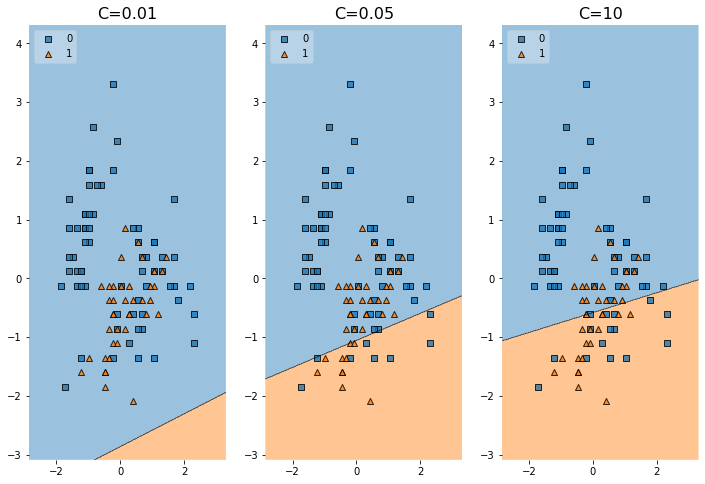

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [logreg_1, logreg_2, logreg_3]


for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Acc., C={clf.get_params()['C']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"C={clf.get_params()['C']}", fontsize=16)


Перейдём к KNN.

### Задание 5.

Обучите три KNN с разным числом соседей.

In [25]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=50)

Acc., n_neighbors=1:  0.8444444444444444
Acc., n_neighbors=5:  0.7555555555555555
Acc., n_neighbors=50:  0.8444444444444444


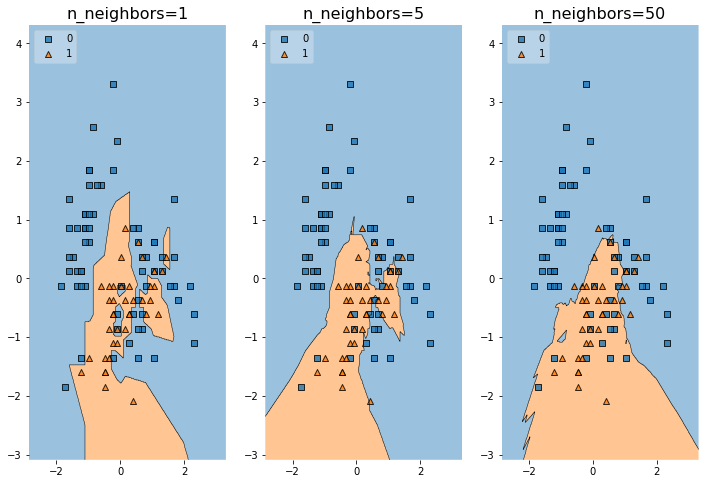

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [knn_1, knn_2, knn_3]


for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Acc., n_neighbors={clf.get_params()['n_neighbors']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"n_neighbors={clf.get_params()['n_neighbors']}", fontsize=16)

#### Дополнительное задание
Зачем мы используем `StandardScaler`? Что будет, если один из входных признаков умножить на 10^6? 

## Нелинейные поверхности

In [27]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, noise = 0.1, factor=0.1)

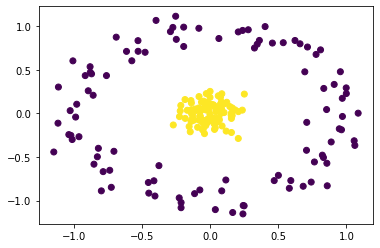

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [30]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, 'Разделяющая поверхность для логрега')

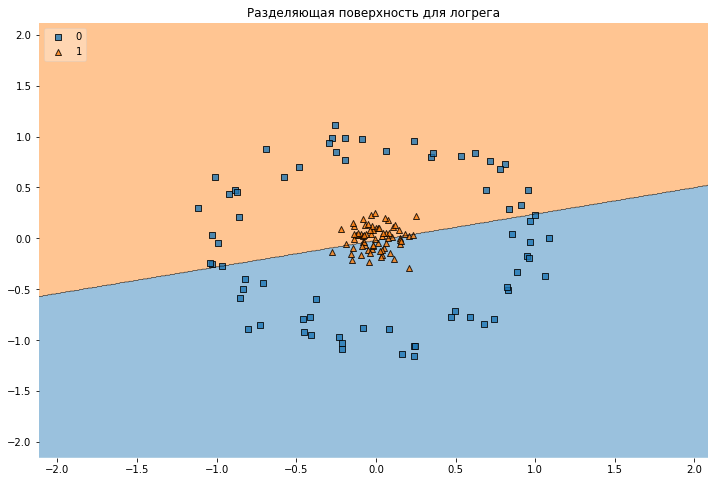

In [31]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега')

### Добавим новый признак

$$
X_3 = X_1^{2} + X_2^{2}
$$

In [32]:
X1 = X[:,0]
X2 = X[:,1]
X3 = X1**2+X2**2

X_new = np.c_[X1, X2, X3]

In [33]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

In [34]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

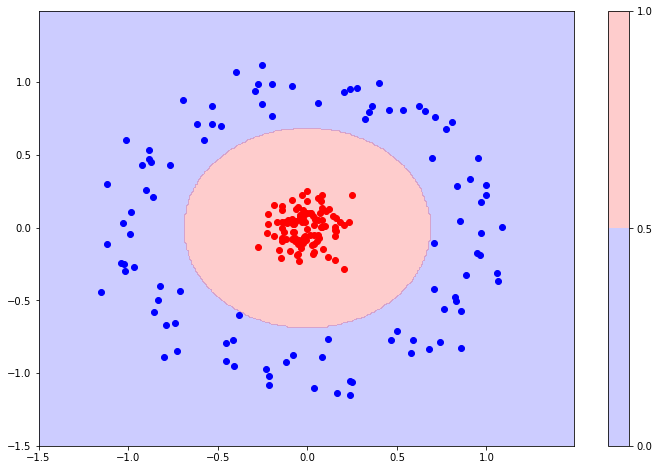

In [35]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=1, cmap=plt.cm.seismic, alpha=0.2)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='b')
plt.scatter(X[y==1,0], X[y==1, 1], c='r')

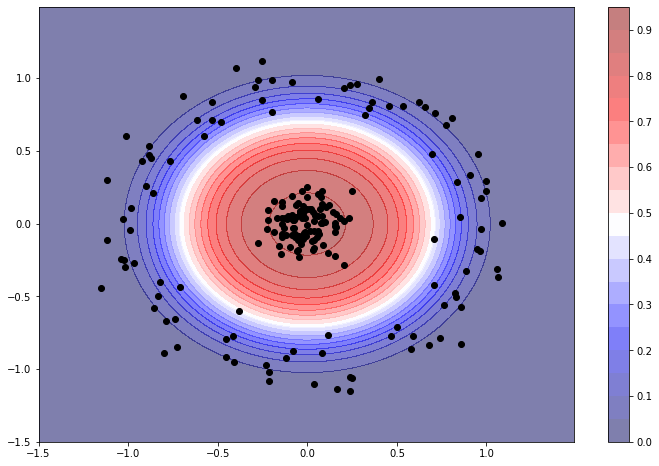

In [36]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict_proba(X_grid)[:, 1]
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=20, cmap=plt.cm.seismic, alpha=0.5)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='0')
plt.scatter(X[y==1,0], X[y==1, 1], c='0')